In [1]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
by_year_df = pd.read_excel('Data/Total_immigration_by_year.xlsx') 
by_year_df.set_index('Year', inplace = True) #set index as year
by_year_df.index= by_year_df.index.astype(str) #change to str for date time format
by_year_df.index = pd.to_datetime(by_year_df.index)#, format='%d/%m/%y') #convert index to correct date time for future slicing
total_immigration = by_year_df['1820-01-01':]
total_immigration.head()

,Number
Year,
1820-01-01,8385
1821-01-01,9127
1822-01-01,6911
1823-01-01,6354
1824-01-01,7912


# Initial Plot of Immigration 1820 - 2017
## World Wars Highlighted and October 29, 1929 (start of GD) Shown

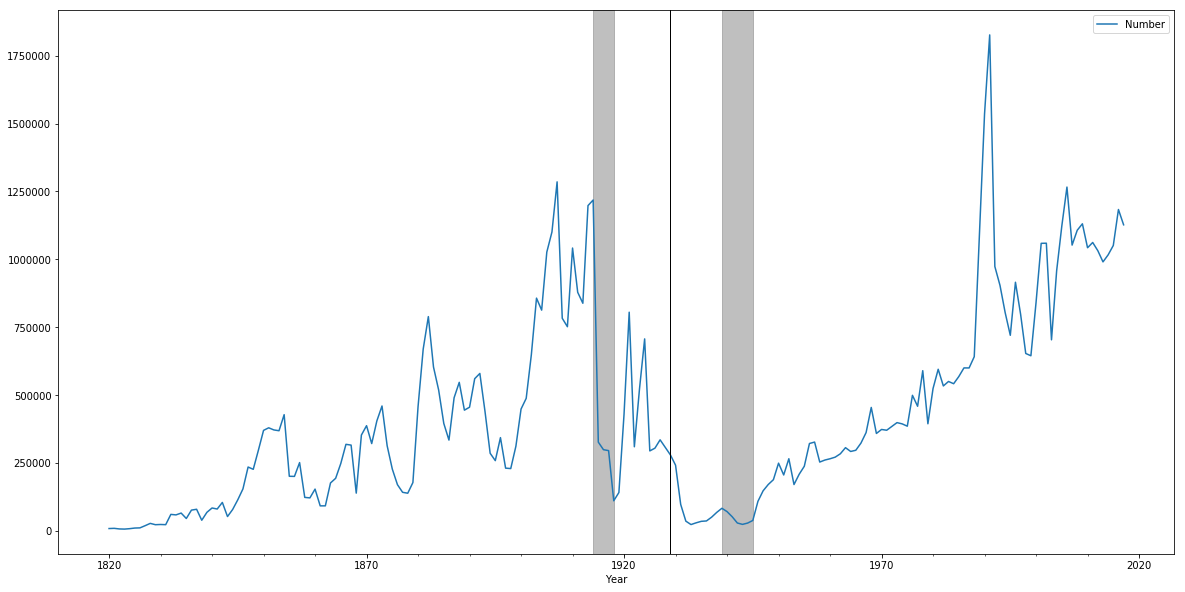

In [73]:
total_immigration.plot(figsize = (20,10))
plt.axvline(pd.to_datetime('1929-10-29'), color='black', linestyle='-', lw=1)

plt.axvspan(pd.to_datetime('1939-09-01'), pd.to_datetime('1945-09-01'), alpha=0.5, color='grey')
plt.axvspan(pd.to_datetime('1914-07-28'), pd.to_datetime('1918-11-11'), alpha=0.5, color='grey')

# Histogram - Number of Immigrants

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c16e366d8>]],
      dtype=object)

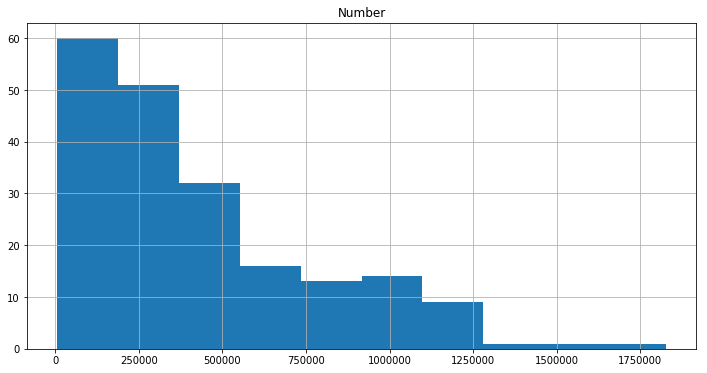

In [6]:
#not informative
total_immigration.hist(figsize = (12,6))

# Kernel Density Estimate plot 

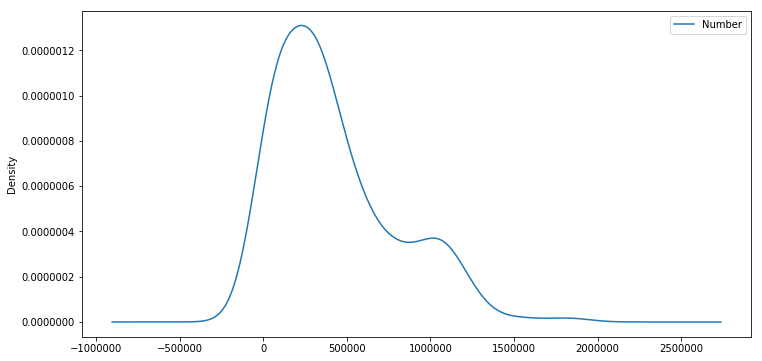

In [7]:
total_immigration.plot(kind='kde', figsize = (12,6))

# Graphing Rolling Mean and SD - window = 6

## Question to research:
- Which window to use? The more windows, the shorter the rolling mean and SD graphed

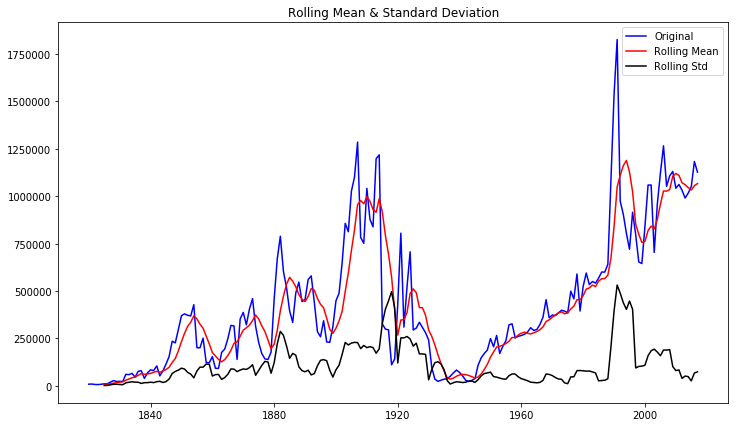

In [77]:
rolmean = total_immigration.rolling(window = 6, center = False).mean()
rolstd = total_immigration.rolling(window = 6, center = False).std()
fig = plt.figure(figsize=(12,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Dickey-Fuller Test

## Question to research:
- How to interpret the Dickey Fuller numbers? / Results of Dickey-Fuller Test?

In [75]:
# from statsmodels.tsa.stattools import adfuller

# dftest = adfuller(total_immigration)
# # Extract and display test results in a user friendly manner
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value
# print(dftest)

# Checking to see if stationary

## 1. Function to check for Stationarity and Graph
### - Rolling Mean and SD with window = 32
### - Plot results of DF Test

In [78]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 32, center = False).mean()
    rolstd = TS.rolling(window = 32, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['Number']) 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput2 = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput2['Critical Value (%s)'%key] = value
    print (dfoutput2)

# 2. Run first stationairty check on initial data
### Results of Dickey-Fuller Test:
- Test Statistic                  -1.038272
### p-value                          0.739051
- #Lags Used                      15.000000
- Number of Observations Used    182.000000
- Critical Value (1%)             -3.466800
- Critical Value (5%)             -2.877555
- Critical Value (10%)            -2.575308


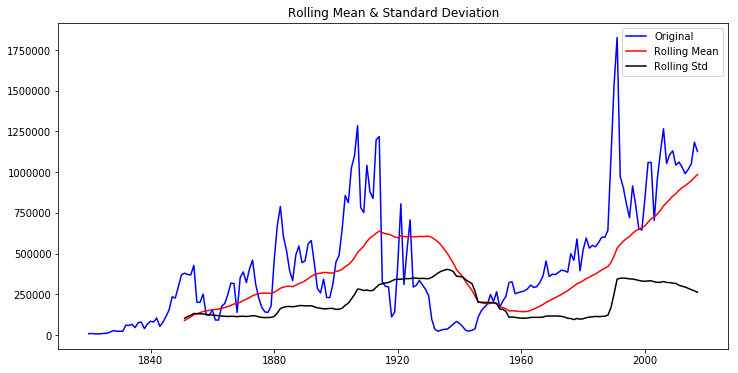

Results of Dickey-Fuller Test:
Test Statistic                  -1.038272
p-value                          0.739051
#Lags Used                      15.000000
Number of Observations Used    182.000000
Critical Value (1%)             -3.466800
Critical Value (5%)             -2.877555
Critical Value (10%)            -2.575308
dtype: float64


In [12]:
stationarity_check(total_immigration)

# 3. Log transformation to minimize non-stationarity
### Results of Dickey-Fuller Test:
- Test Statistic                  2.682961          
### p-value                           0.077033
- #Lags Used                      7.000000
- Number of Observations Used    190.000000
- Critical Value (1%)             -3.465244
- Critical Value (5%)             -2.876875
- Critical Value (10%)            -2.574945

In [79]:
import numpy as np
index = total_immigration.index

In [80]:
type(total_immigration)

pandas.core.frame.DataFrame

In [81]:
test = total_immigration.Number
type(test)

pandas.core.series.Series

In [82]:
immigration_array = test.as_matrix() #convert to numpy array
# immigration_array

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [83]:
data = pd.Series(np.log(immigration_array), index=index)
# data

Text(0, 0.5, 'log(Total_immigration_by_year)')

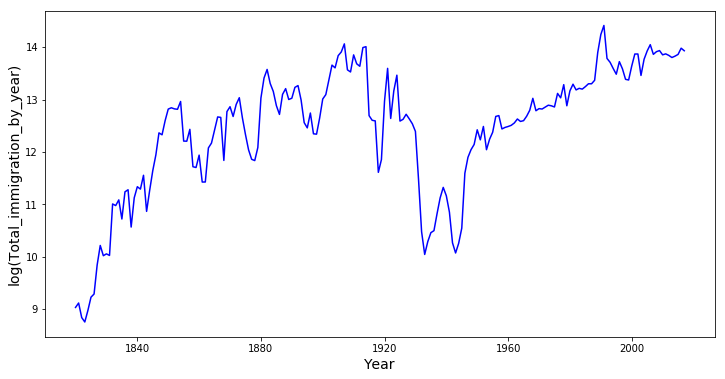

In [21]:
fig = plt.figure(figsize=(12,6))
plt.plot(data, color="blue")
plt.xlabel("Year", fontsize=14)
plt.ylabel("log(Total_immigration_by_year)", fontsize=14)
# plt.show()

In [86]:
data_df = data.to_frame()
data_df = data_df.rename(index=str, columns={0:'Number'})
# data_df

In [87]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-2.682960863472633, 0.0770334792303962, 7, 190, {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}, 122.4391885939828)


In [88]:
dfoutput

Test Statistic                  -2.682961
p-value                          0.077033
#Lags Used                       7.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64

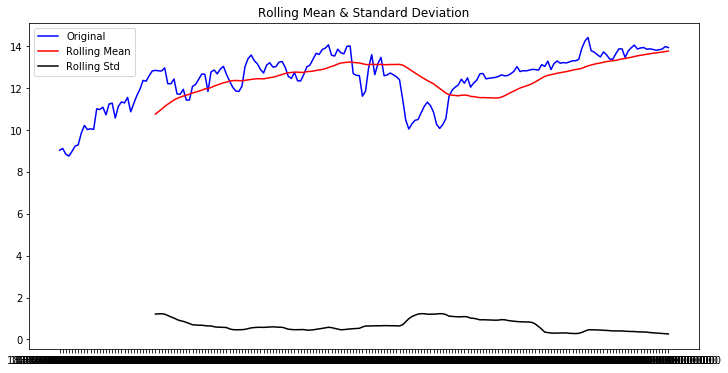

Results of Dickey-Fuller Test:
Test Statistic                  -2.682961
p-value                          0.077033
#Lags Used                       7.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [89]:
stationarity_check(data_df)

# 4. Square Root transformation to minimize non-stationarity

Text(0, 0.5, 'sqrt(total_immigration)')

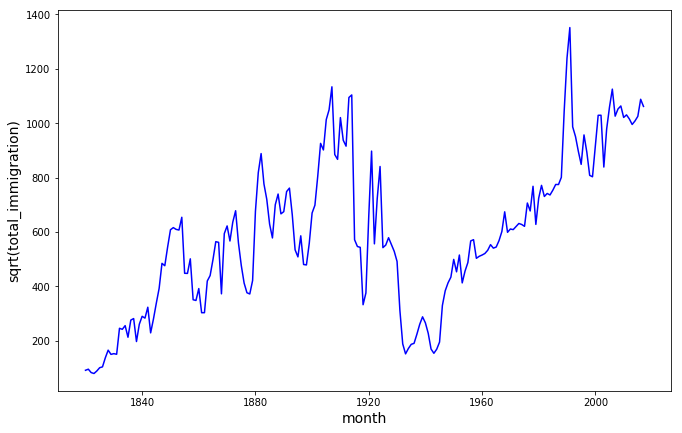

In [26]:
data_sqrt = pd.Series(np.sqrt(immigration_array), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data_sqrt, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("sqrt(total_immigration)", fontsize=14)


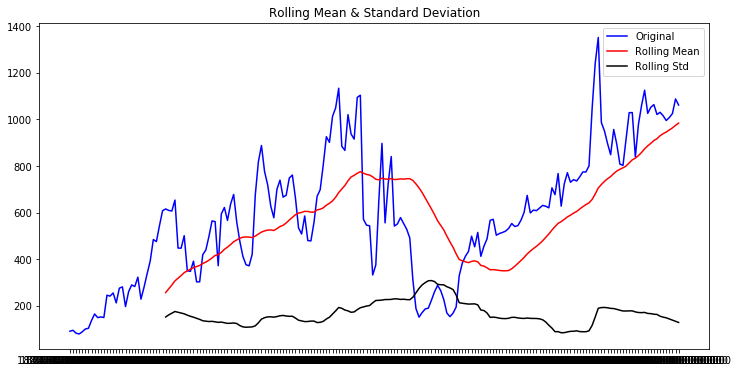

Results of Dickey-Fuller Test:
Test Statistic                  -1.662116
p-value                          0.450729
#Lags Used                       8.000000
Number of Observations Used    189.000000
Critical Value (1%)             -3.465431
Critical Value (5%)             -2.876957
Critical Value (10%)            -2.574988
dtype: float64


In [27]:
data_sqrt_df = data_sqrt.to_frame()
data_sqrt_df = data_sqrt_df.rename(index=str, columns={0:'Number'})

stationarity_check(data_sqrt_df)

# 5. Subtracting the rolling mean

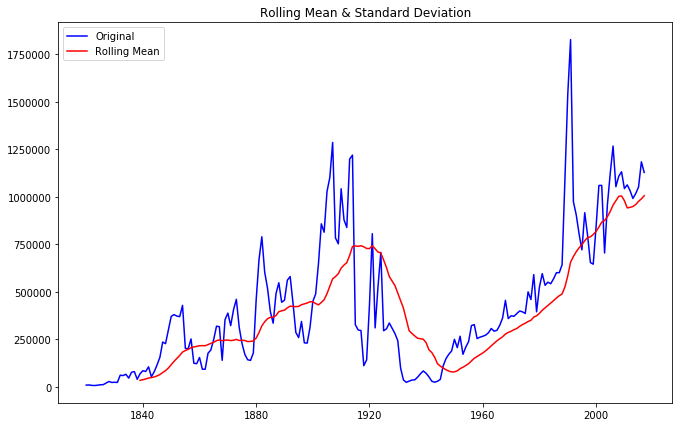

In [90]:
rolmean = total_immigration.rolling(window = 20).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [91]:
data_minus_rolmean = total_immigration - rolmean
# data_minus_rolmean.head(15)

In [92]:
data_minus_rolmean.dropna(inplace=True)

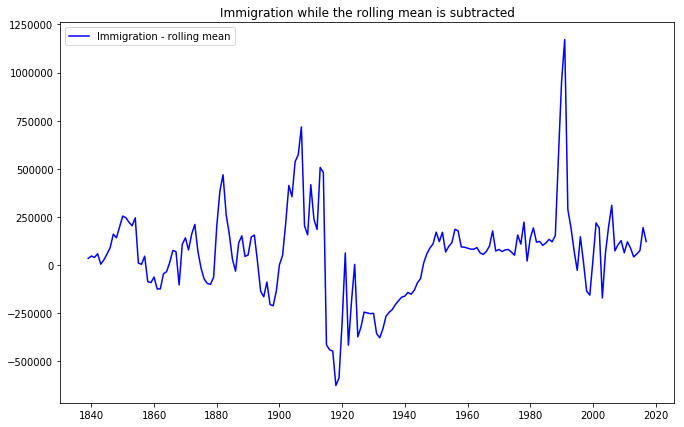

In [93]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Immigration while the rolling mean is subtracted')
plt.show(block=False)

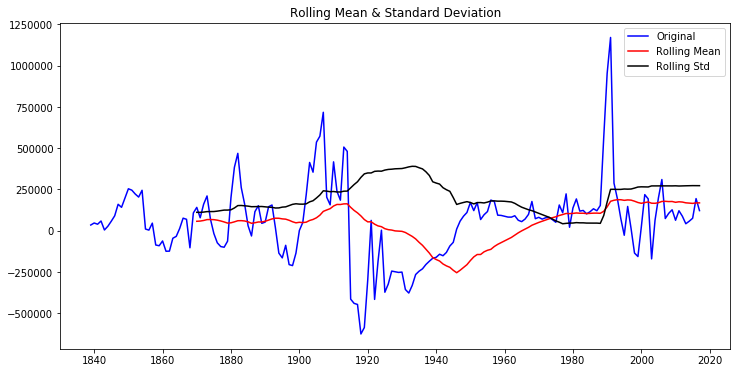

Results of Dickey-Fuller Test:
Test Statistic                  -2.916354
p-value                          0.043479
#Lags Used                      12.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [94]:
stationarity_check(data_minus_rolmean)

# 6. The weighted rolling mean / weighted moving average
- More recent values are given a higher weight
- Below using Exponentially Weighted Moving Average where weights are assigned to all the previous values with an exponential decay factor
    - the parameter ‘halflife’ is used to define the amount of exponential decay. 
    - Other parameters like span and center of mass can also be used to define decay
    - more info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html

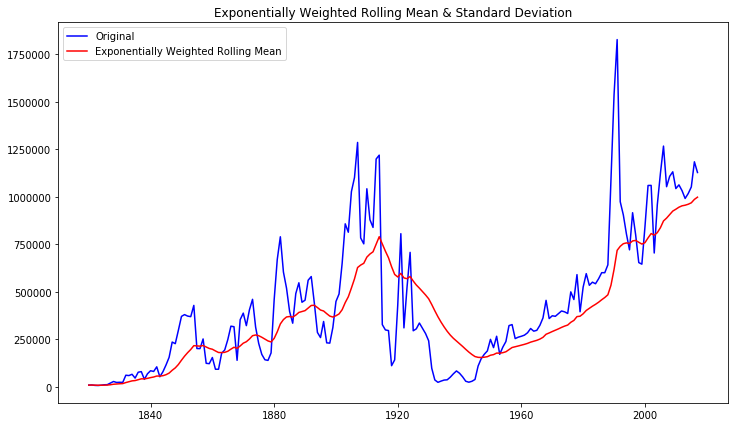

In [43]:
exp_rolmean = total_immigration.ewm(halflife = 8).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

# 7. Subtract the Exponentially Weighted Moving Average from the Original Data

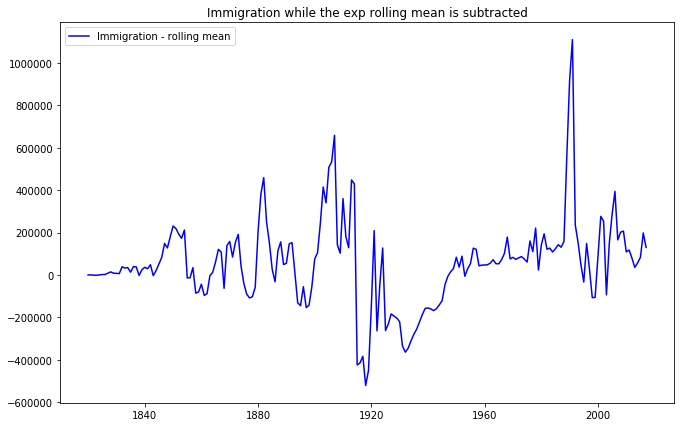

In [95]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = total_immigration - exp_rolmean
data_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Immigration while the exp rolling mean is subtracted')
plt.show(block=False)

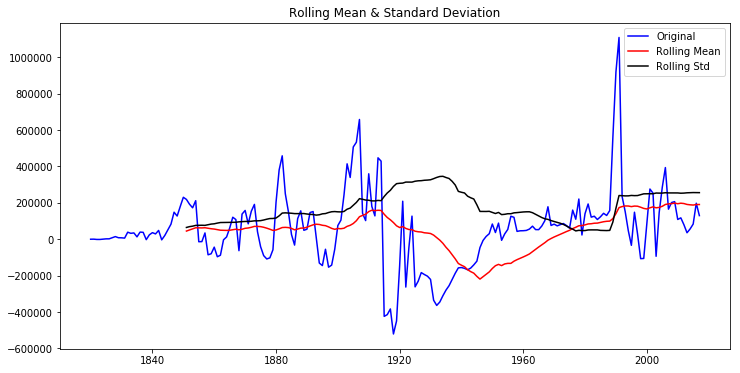

Results of Dickey-Fuller Test:
Test Statistic                  -2.385038
p-value                          0.146004
#Lags Used                      15.000000
Number of Observations Used    182.000000
Critical Value (1%)             -3.466800
Critical Value (5%)             -2.877555
Critical Value (10%)            -2.575308
dtype: float64


In [96]:
stationarity_check(data_minus_exp_rolmean)

# Differencing
- deal with both trend and seasonality 
- take the difference of an observation at a particular time instant with that at the previous instant (i.e. a co-called 1-period "lag")
## Question to research:
- How do you when you've differenced enough?

# 8.Use the new data where exp rolling mean is subtracted and difference it by 20 periods

In [97]:
#twelve period lag
data_diff = data_minus_exp_rolmean.diff(periods=20)
data_diff.tail(20)

,Number
Year,
1998-01-01,-327755.325185
1999-01-01,-128938.399082
2000-01-01,-57564.367801
2001-01-01,82178.824589
2002-01-01,132069.517560
2003-01-01,-220239.128738
2004-01-01,38828.588756
2005-01-01,162185.546736
2006-01-01,251423.756349


In [98]:
data_diff.notnull().sum()

Number    178
dtype: int64

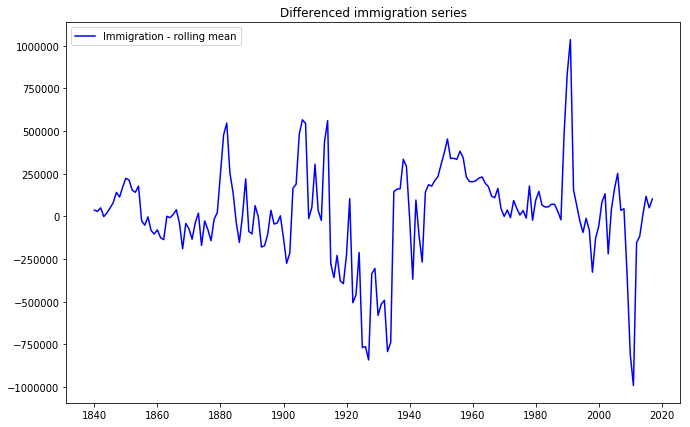

In [99]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Differenced immigration series')
plt.show(block=False)

In [100]:
data_droppedna= data_diff.dropna()


In [103]:
# data_droppedna#

In [104]:
# data_diff = data_droppedna.to_frame()
data_diff = data_droppedna.rename(index=str, columns={0:'Number'})
# data_diff

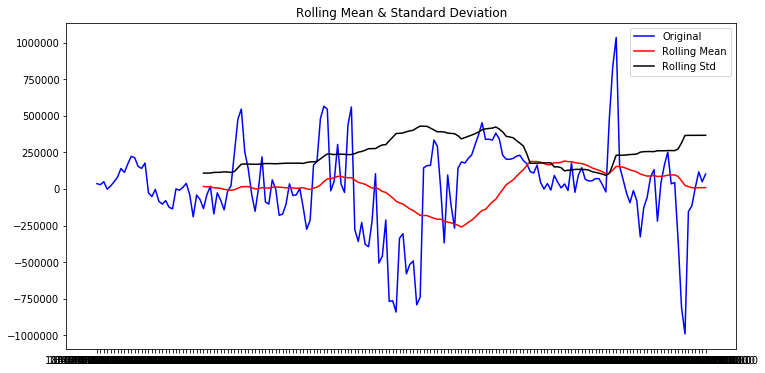

Results of Dickey-Fuller Test:
Test Statistic                  -3.240966
p-value                          0.017733
#Lags Used                       7.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


In [105]:
stationarity_check(data_diff)

# 9. Use the data where rolling mean is subtracted and difference it by 20 periods

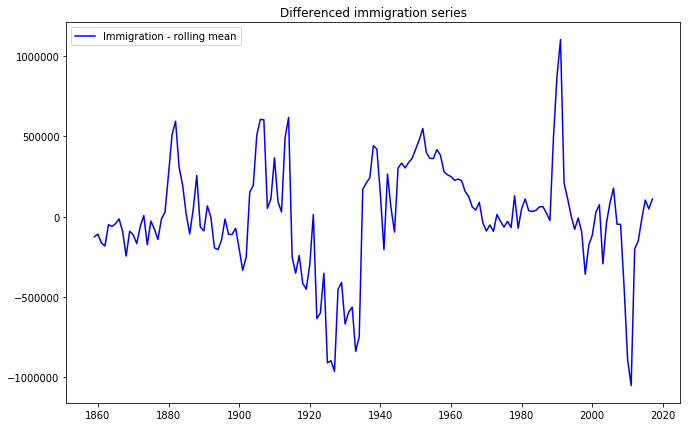

In [107]:

data_diff2 = data_minus_rolmean.diff(periods=20)
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff2, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Differenced immigration series')
plt.show(block=False)


In [108]:
data_droppedna2= data_diff2.dropna()

In [109]:
data_diff2 = data_droppedna2.rename(index=str, columns={0:'Number'})
# data_diff

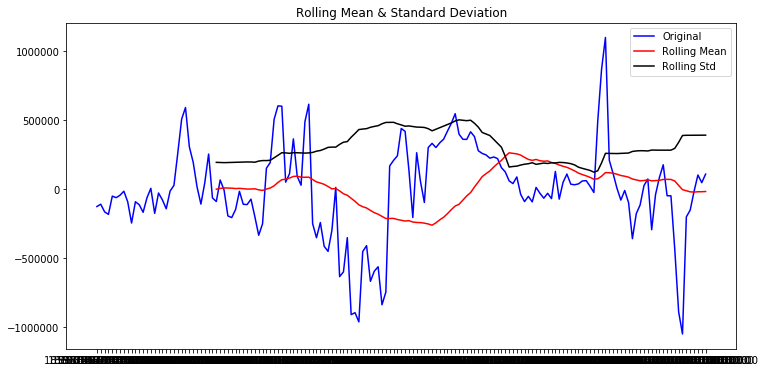

Results of Dickey-Fuller Test:
Test Statistic                  -3.107880
p-value                          0.025976
#Lags Used                       7.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


In [110]:
stationarity_check(data_diff2)